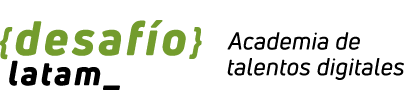

<center><h1> <font color='green'>Cluster Jerárquicos</font></h1></center>

## Importar librerías y cargar datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

# Cargar el conjunto de datos Iris
iris = load_iris()
X = pd.DataFrame(iris.data)

## Probar diferentes métodos de enlace

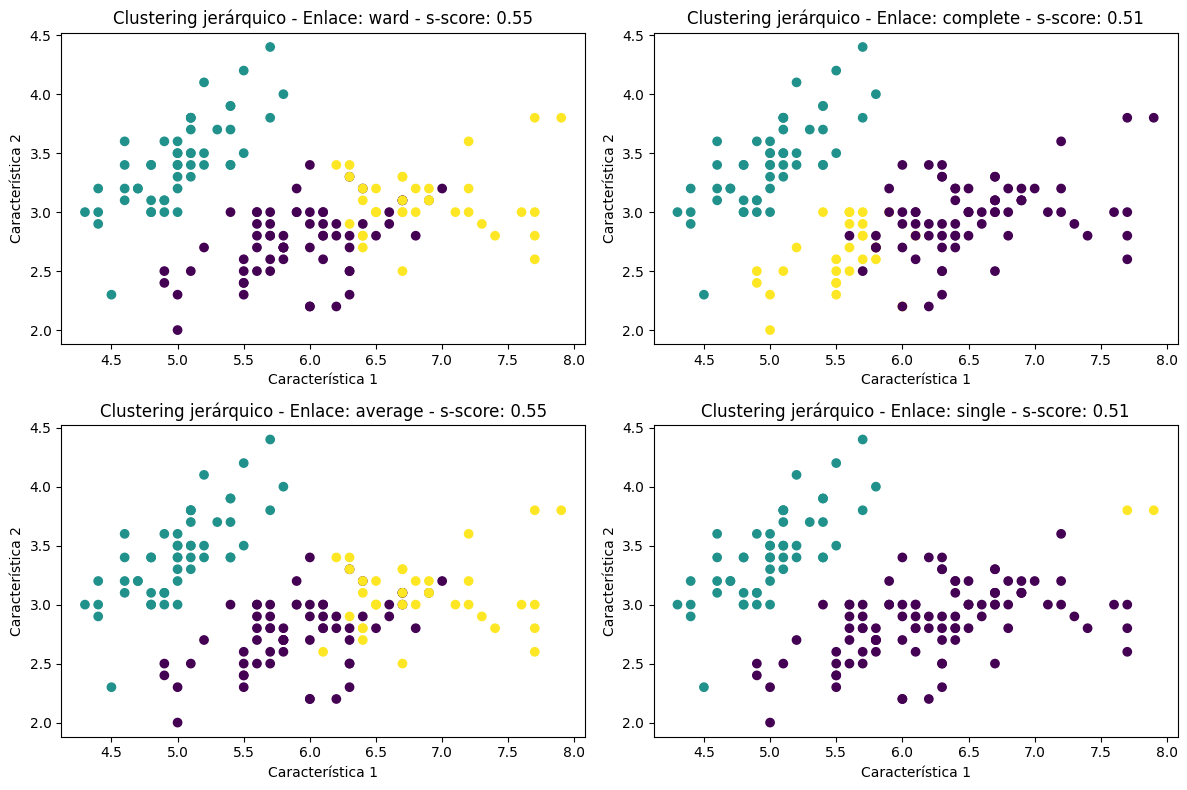

In [2]:
# Realizar clustering jerárquico con diferentes métodos de enlace. Para ello creamos la lista
linkage_methods = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(12, 8))
for i, method in enumerate(linkage_methods):
    # Realizar clustering jerárquico con el método de enlace actual
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = clustering.fit_predict(X)
    sc = silhouette_score(X, labels)

    # Graficar los puntos en un diagrama de dispersión para las dos primeras columnas
    plt.subplot(2, 2, i+1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title(f'Clustering jerárquico - Enlace: {method} - s-score: {sc:.2f}')

plt.tight_layout()
plt.show()

## Dendrogramas

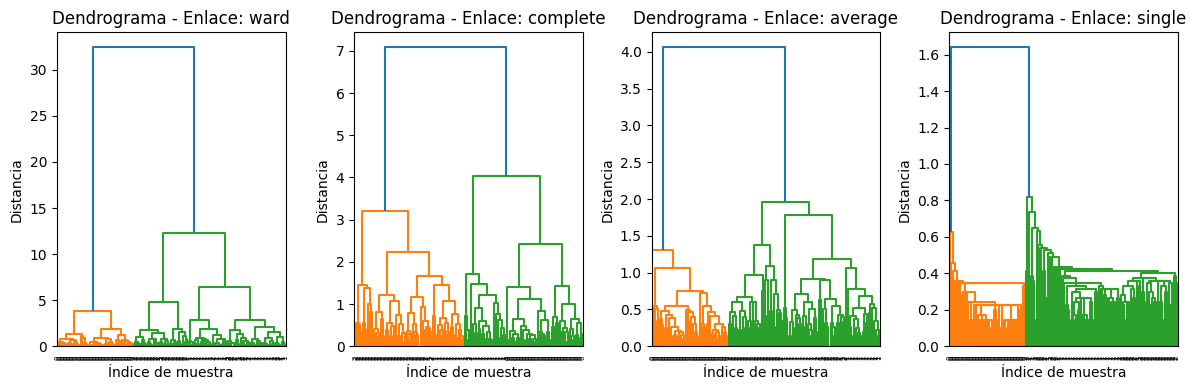

In [3]:

# Graficar los dendrogramas
plt.figure(figsize=(12, 4))
for i, method in enumerate(linkage_methods):
    # Realizar clustering jerárquico con el método de enlace actual
    Z = linkage(X, method)

    # Convertir la matriz de enlace a tipo float
    Z = Z.astype(float)

    # Graficar el dendrograma
    plt.subplot(1, 4, i+1)
    dendrogram(Z, labels=iris.target)
    plt.xlabel('Índice de muestra')
    plt.ylabel('Distancia')
    plt.title(f'Dendrograma - Enlace: {method}')

plt.tight_layout()
plt.show()


In [6]:
iris.columns

AttributeError: columns

## Observamos los cluster con el método mejor evaluado

In [4]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = clustering.fit_predict(X)

# Analizar los clusters obtenidos
for cluster in range(3):
    cluster_indices = np.where(labels == cluster)[0]
    cluster_samples = iris.data[cluster_indices]
    cluster_target = iris.target[cluster_indices]
    cluster_name = iris.target_names[cluster]
    print(f'Cluster {cluster}: {cluster_name}')
    print(f'Número de muestras: {len(cluster_samples)}')
    print(f'Características más representativas: {np.mean(cluster_samples, axis=0)}')
    print(f'Etiquetas reales en el cluster: {np.unique(cluster_target)}')
    print('---')


Cluster 0: setosa
Número de muestras: 64
Características más representativas: [5.9203125 2.7515625 4.4203125 1.434375 ]
Etiquetas reales en el cluster: [1 2]
---
Cluster 1: versicolor
Número de muestras: 50
Características más representativas: [5.006 3.428 1.462 0.246]
Etiquetas reales en el cluster: [0]
---
Cluster 2: virginica
Número de muestras: 36
Características más representativas: [6.86944444 3.08611111 5.76944444 2.10555556]
Etiquetas reales en el cluster: [1 2]
---
